<a href="https://colab.research.google.com/github/y0tish/Play-Store-App-Review-Analysis/blob/main/Yotish_Lakhanpal_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [41]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
url = '/content/drive/MyDrive/Copy of Play Store Data.csv'
playstore_df = pd.read_csv(url)
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [44]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [45]:
url1='/content/drive/MyDrive/Colab Notebooks/User Reviews.csv'
user_df = pd.read_csv(url1)
user_df.sample(8)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
20565,CW Seed,good,Positive,0.700000,0.600000
38358,ESPN,NaN,NaN,NaN,NaN
26823,Clash Royale,I would like know emotes in-app purchases only...,Positive,0.145000,0.495000
40506,Episode - Choose Your Story,Very addicting. Love stories. Hate wait four h...,Negative,-0.180000,0.640000
54427,Golf Channel,Don't know done. Used work fine last update co...,Negative,-0.034444,0.522222
31661,DC Super Hero Girls™,This best game I ever played,Positive,0.300000,0.350000
1173,7 Day Food Journal Challenge,Not great business model It listed free really...,Positive,0.131250,0.712500
48652,"Fox News – Breaking News, Live Video & News Al...",NaN,NaN,NaN,NaN


In [46]:
user_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [47]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [48]:
playstore_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
776,TOEFL Prep & Practice from Magoosh,EDUCATION,4.5,756,12M,"100,000+",Free,0,Everyone,Education,"June 18, 2018",3.2.0,4.1 and up
2252,Essential Anatomy 3,MEDICAL,4.1,1533,42M,"50,000+",Paid,$11.99,Mature 17+,Medical,"August 7, 2014",1.1.3,4.0.3 and up
8172,Dan the Man: Action Platformer,GAME,4.8,528550,73M,"10,000,000+",Free,0,Teen,Arcade,"July 26, 2018",1.2.6,4.1 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
2162,Block Puzzle : Night in Egypt,FAMILY,4.4,276,16M,"50,000+",Free,0,Everyone,Puzzle;Brain Games,"September 12, 2017",1.2.16,2.3 and up
7553,CM FILE MANAGER,TOOLS,4.4,953790,Varies with device,"50,000,000+",Free,0,Everyone,Tools,"August 5, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
9746,Plastic Surgery Surgeon Simulator Er Doctor Games,FAMILY,3.7,3482,37M,"500,000+",Free,0,Everyone,Casual,"August 7, 2018",1.6,4.4 and up
1074,Credit Karma,FINANCE,4.7,706301,Varies with device,"10,000,000+",Free,0,Everyone,Finance,"July 31, 2018",Varies with device,Varies with device
7546,CM AppLock,TOOLS,4.1,843,3.6M,"100,000+",Free,0,Everyone,Tools,"February 25, 2016",2.0.0,4.0 and up


In [49]:
playstore_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [50]:
playstore_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [51]:
playstore_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [52]:
playstore_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [53]:
playstore_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

By exploring the data frame, we know that:

1)There are 13 columns  with 10841 rows of data.

2)Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'.
Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.

3)Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.

4)Values of column 'Price' are strings representing price with symbol '$'.

**Cleaning the Review column**

---



In [54]:
review_list = [review for review in playstore_df['Reviews']]


In [55]:
#Cleaning the Review column
Data = []
def cleaned_review(lst):
  for i in lst:
    if 'M' in i:
      i = i.replace('M','') #removing the string'M'
      i = float(i)*1000000 #multiply with million
      Data.append(i)
    else:
      Data.append(i)

  return Data    

In [56]:
review_list =  cleaned_review(review_list)


In [57]:
 playstore_df['Reviews'] = review_list
 #changing the type of column
 playstore_df['Reviews']=playstore_df['Reviews'].astype(float)

**Cleaning the Size column**

---



In [58]:
#Cleaning the Size column
size_list = [size for size in playstore_df['Size']]

In [59]:
Data=[]
def clean_size(lst):
  for i in lst:
    if 'M' in i:
      i=i.replace('M','')#removing the string'M'
      Data.append(i)
    elif 'k' in i:
      i=i.replace('k','')#removing the string'k'
      i=float(i)/1024 #converting kb to mb
      Data.append(i)
    else:
        Data.append(0)
  return Data        


In [60]:
 playstore_df['Size'] = clean_size(size_list)


In [61]:
playstore_df['Size']

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10836     53
10837    3.6
10838    9.5
10839      0
10840     19
Name: Size, Length: 10841, dtype: object

In [62]:
 #changing the type of column
 playstore_df['Size']=playstore_df['Size'].astype(float)

**Cleaning the Instal column**

---



In [63]:
#Cleaning the Instal column
Instal_list = [Install for Install in playstore_df['Installs']]


In [64]:
Data = []
def clean_Install(lst):
  for i in lst:
    if '+' in i:
      i=i.replace('+','')#removing the signs
      i = i.replace(',','')
      Data.append(i)
    else:
      
      Data.append(0)

  return Data  


In [65]:
playstore_df['Installs']=clean_Install(Instal_list)

In [66]:
#changing the type of column
playstore_df['Installs']=playstore_df['Installs'].astype(float)

**Cleaning the price column**

---



In [67]:
#Cleaning the price column
price_list = [price for price in playstore_df['Price']]

In [68]:
correct_Data =[]
def clean_price(lst):
  for i in lst:
    if '$' in i:
      i=i.replace('$','') #removing'$'
      correct_Data.append(i)
    elif 'Everyone' in i:#replacing 'everyone-->0'
      correct_Data.append(0)
    else:
      correct_Data.append(i)
  return correct_Data      

In [69]:
playstore_df['Price']=clean_price(price_list)

In [70]:
#changing the type of column
playstore_df['Price']=playstore_df['Price'].astype(float)

In [71]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


**Subsituting Null Values**

---



In [72]:
# check on null values
playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Here, we realized that there are 1474 rows having null values under column 'Rating'. Hence, we decided to replace the null values with median of overall 'Rating' values.

In [73]:
#Subsituting null values  with median
playstore_df['Rating']=playstore_df['Rating'].fillna(playstore_df['Rating'].median())

In [74]:
playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [75]:
#Taking care of null values of Type Column
index = playstore_df[playstore_df['Type'].isna()].index
playstore_df.drop(axis=0, inplace=True, index=index)

In [76]:
playstore_df['Type'].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [77]:
playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

**Exploratory Data Analysis and Visualization**

---



In [78]:
#General Analysis of Data Frame
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.2+ MB


In [79]:
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [80]:
#Dropping a null row
playstore_df=playstore_df.drop([10472],axis=0)

In [81]:
#Dropping Duplicates
playstore_df.drop_duplicates(subset=['App'], inplace=True)

In [82]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Reviews         9658 non-null   float64
 4   Size            9658 non-null   float64
 5   Installs        9658 non-null   float64
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   float64
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9650 non-null   object 
 12  Android Ver     9656 non-null   object 
dtypes: float64(5), object(8)
memory usage: 1.0+ MB


Text(0, 0.5, 'Number of Apps')

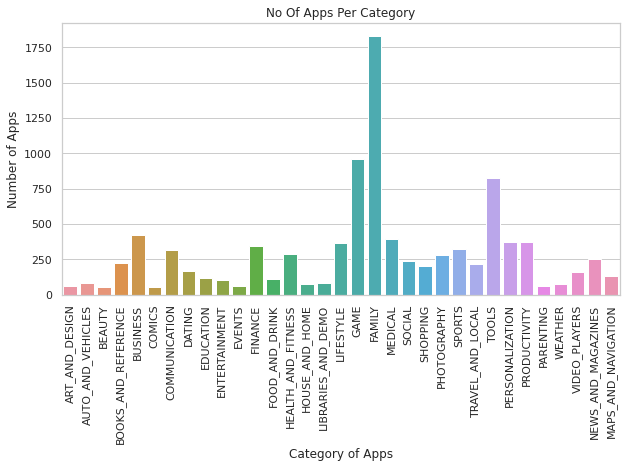

In [83]:
#counting no of apps in each category
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.countplot(x='Category',data= playstore_df)
plt.xticks(rotation=90)
plt.title('No Of Apps Per Category')
plt.xlabel('Category of Apps')
plt.ylabel('Number of Apps')

In [84]:
#finding most no of install in each Category
df1=playstore_df.groupby('Category')['Installs'].sum().sort_values().reset_index()

Text(0, 0.5, 'Number of Installs(e+10)')

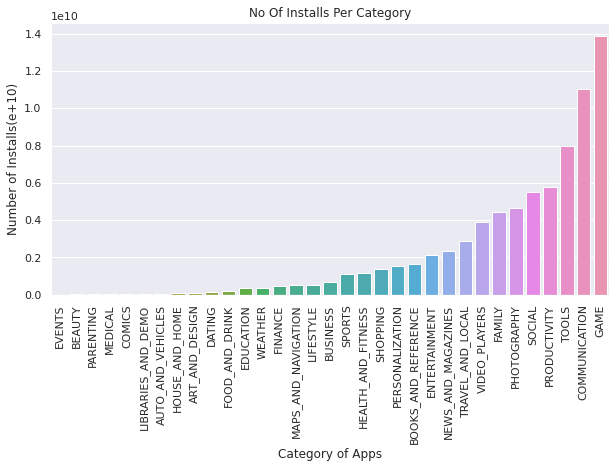

In [85]:
#Ploting the barplot for most installs
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.barplot(data=df1,x='Category',y='Installs')
plt.xticks(rotation=90)
plt.title('No Of Installs Per Category')
plt.xlabel('Category of Apps')
plt.ylabel('Number of Installs(e+10)')

In [86]:
#Checking GAME Category
game_category=playstore_df[playstore_df['Category']=='GAME']
game_category

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388.0,67.0,1.000000e+08,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677.0,74.0,5.000000e+08,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258.0,23.0,1.000000e+07,Free,0.0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897.0,46.0,1.000000e+07,Free,0.0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,GAME,4.0,1287.0,38.0,5.000000e+04,Free,0.0,Everyone,Word,"December 18, 2013",1.0,2.2 and up
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661.0,16.0,1.000000e+06,Free,0.0,Everyone,Trivia,"May 24, 2018",1.3.81,4.0 and up
10793,Sid Story,GAME,4.4,28510.0,78.0,5.000000e+05,Free,0.0,Teen,Card,"August 1, 2018",2.6.6,4.0.3 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496.0,81.0,1.000000e+06,Free,0.0,Teen,Action,"August 7, 2018",1.5.447,4.0 and up


In [87]:
#Top 10 apps in GAME Category
top_game_install=game_category.groupby('App')['Installs'].max().sort_values(ascending=False).reset_index()
top_10_game_install=top_game_install.head(10)

Text(0, 0.5, 'installs(e+9)')

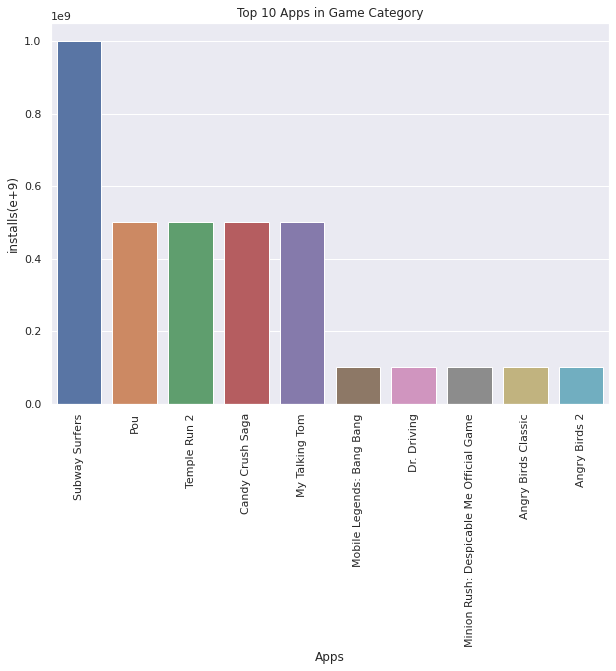

In [88]:
#bar ploot between top 10 game apps and  installs
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
sns.barplot(data=top_10_game_install,x='App',y='Installs')
plt.xticks(rotation=90)
plt.title('Top 10 Apps in Game Category')
plt.xlabel('Apps')
plt.ylabel('installs(e+9)')

In [89]:
top_game_install_size=game_category.groupby('App')['Installs','Size','Rating','Type'].max().sort_values(by='Installs',ascending=False).reset_index()
top_game_install_size.head(10)

<ipython-input-89-0f011e9789cf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_game_install_size=game_category.groupby('App')['Installs','Size','Rating','Type'].max().sort_values(by='Installs',ascending=False).reset_index()


,App,Installs,Size,Rating,Type
0,Subway Surfers,1.000000e+09,76.0,4.5,Free
1,Pou,5.000000e+08,24.0,4.3,Free
2,Temple Run 2,5.000000e+08,62.0,4.3,Free
3,Candy Crush Saga,5.000000e+08,74.0,4.4,Free
4,My Talking Tom,5.000000e+08,0.0,4.5,Free
5,Mobile Legends: Bang Bang,1.000000e+08,99.0,4.4,Free
6,Dr. Driving,1.000000e+08,9.9,4.5,Free
7,Minion Rush: Despicable Me Official Game,1.000000e+08,0.0,4.5,Free
8,Angry Birds Classic,1.000000e+08,97.0,4.4,Free
9,Angry Birds 2,1.000000e+08,57.0,4.6,Free


In [90]:
#Just checking some paid game apps
Paid_games=game_category[game_category['Type']=='Paid']

In [91]:
top_paid_game=Paid_games.groupby('App')['Installs','Size','Rating','Price'].max().sort_values(by='Installs',ascending=False).reset_index()
top_paid_game.head(10)

<ipython-input-91-850b40862146>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_paid_game=Paid_games.groupby('App')['Installs','Size','Rating','Price'].max().sort_values(by='Installs',ascending=False).reset_index()


,App,Installs,Size,Rating,Price
0,Hitman Sniper,10000000.0,29.0,4.6,0.99
1,Zombie Avengers:(Dreamsky)Stickman War Z,1000000.0,96.0,4.3,0.99
2,Lost Journey (Dreamsky),1000000.0,29.0,4.5,0.99
3,Stickman Legends: Shadow Wars,1000000.0,100.0,4.4,0.99
4,Five Nights at Freddy's,1000000.0,50.0,4.6,2.99
5,Fruit Ninja Classic,1000000.0,36.0,4.3,0.99
6,League of Stickman 2018- Ninja Arena PVP(Dream...,1000000.0,99.0,4.4,0.99
7,Grand Theft Auto: San Andreas,1000000.0,26.0,4.4,6.99
8,DraStic DS Emulator,1000000.0,12.0,4.6,4.99
9,Assassin's Creed Identity,500000.0,92.0,3.7,1.99


In [92]:
#Checking Reviews for each Category
df1=playstore_df.groupby('Category')['Reviews'].sum().sort_values().reset_index()

Text(0, 0.5, 'Number of Reviews')

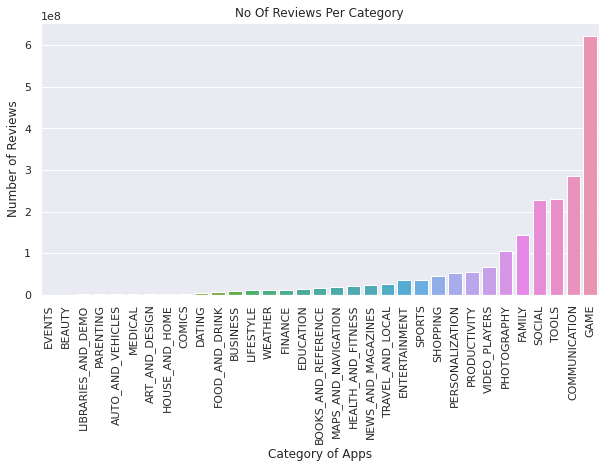

In [93]:
#Ploting most no of reviews for each category
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.barplot(data=df1,x='Category',y='Reviews')
plt.xticks(rotation=90)
plt.title('No Of Reviews Per Category')
plt.xlabel('Category of Apps')
plt.ylabel('Number of Reviews')

In [94]:
#Checking sizes on each category
df1=playstore_df.groupby('Category')['Size'].sum().sort_values().reset_index()

Text(0, 0.5, 'Size(MB)')

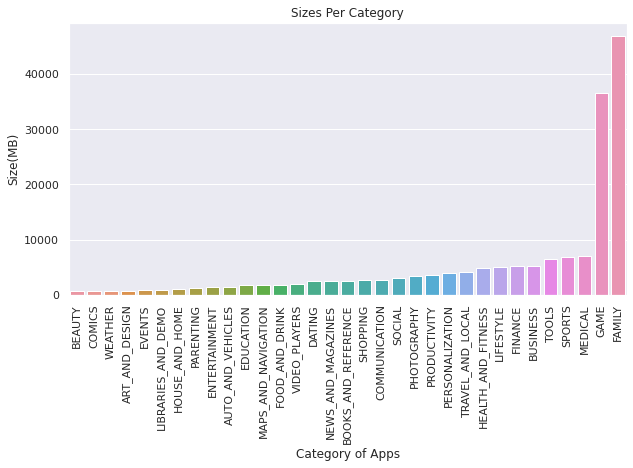

In [95]:
#ploting bar graph for most no of sizes of apps and each category 
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.barplot(data=df1,x='Category',y='Size')
plt.xticks(rotation=90)
plt.title('Sizes Per Category')
plt.xlabel('Category of Apps')
plt.ylabel('Size(MB)')

In [96]:
game_category.groupby('App')['Installs','Size','Rating','Type'].max().sort_values(by='Size',ascending=False).reset_index()

<ipython-input-96-750c2924cdd4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  game_category.groupby('App')['Installs','Size','Rating','Type'].max().sort_values(by='Size',ascending=False).reset_index()


,App,Installs,Size,Rating,Type
0,Car Crash III Beam DH Real Damage Simulator 2018,10000.0,100.0,3.6,Free
1,Hungry Shark Evolution,100000000.0,100.0,4.5,Free
2,Mini Golf King - Multiplayer Game,5000000.0,100.0,4.5,Free
3,The Walking Dead: Our World,1000000.0,100.0,4.0,Free
4,Miami crime simulator,10000000.0,100.0,4.0,Free
...,...,...,...,...,...
954,Survival Run with Bear Grylls,5000000.0,0.0,4.2,Free
955,SuperBikers 2,500000.0,0.0,3.9,Free
956,Galaxy Attack: Alien Shooter,10000000.0,0.0,4.6,Free
957,Gardenscapes,50000000.0,0.0,4.6,Free


In [97]:
#Dataframe for most paid apps in the respective category
df1=playstore_df.groupby('Category')['Price'].sum().sort_values().reset_index()

Text(0, 0.5, 'Price($)')

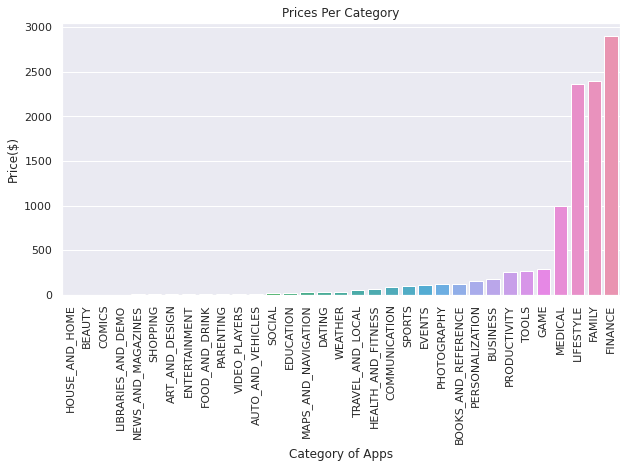

In [98]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.barplot(data=df1,x='Category',y='Price')
plt.xticks(rotation=90)
plt.title('Prices Per Category')
plt.xlabel('Category of Apps')
plt.ylabel('Price($)')

In [99]:
#Checking each app Rating in respective Category
df1=playstore_df.groupby('Category')['Rating'].max().sort_values().reset_index()

Text(0, 0.5, 'Rating')

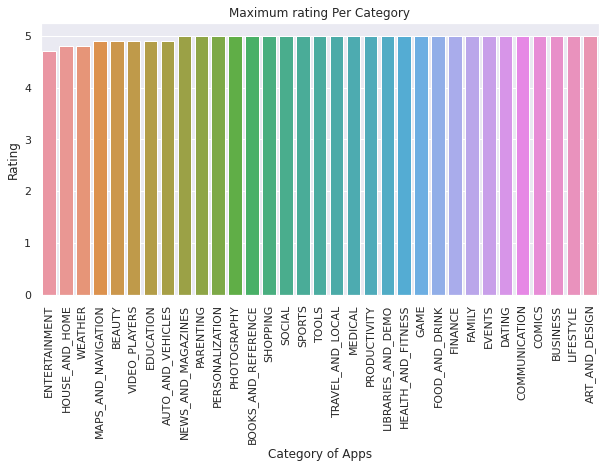

In [100]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.barplot(data=df1,x='Category',y='Rating')
plt.xticks(rotation=90)
plt.title('Maximum rating Per Category')
plt.xlabel('Category of Apps')
plt.ylabel('Rating')

From Above Graphs we can interpret following points

a) The most number of apps in playstore are of Family(Highest),Game and Tools.


b)Also the most no of Installs is for game whereas for category family has less no of intalls. The Communication Category has quite less no of apps but this category has 2nd in most No of intalls.


c)Maximun Reviews are also for Game, Communication and tools.

d)Maximum paid apps is for Finanace and lifstyles apps


**Number of Apps based on Type**

---



Text(0, 0.5, 'Number of Apps')

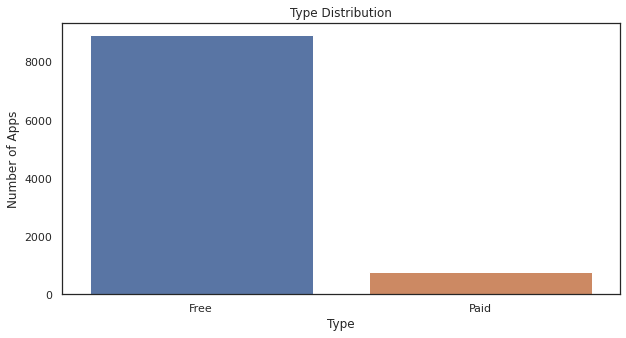

In [101]:
#counting the apps weather its free or paid
plt.figure(figsize=(10,5))
sns.set_theme(style="white")
sns.countplot(x='Type',data= playstore_df)

plt.title('Type Distribution')
plt.xlabel('Type')
plt.ylabel('Number of Apps')

More Apps are free in Playstore




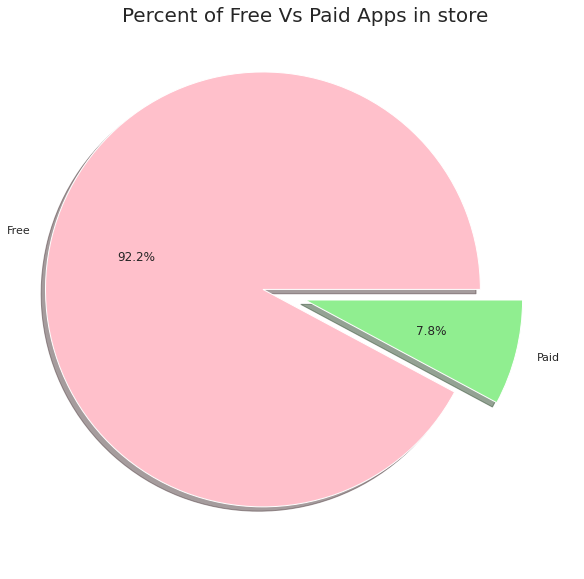

In [102]:
#finding the percentage of free and paid apps
plt.figure(figsize=(10,10))
labels = playstore_df['Type'].value_counts(sort = True).index
sizes = playstore_df['Type'].value_counts(sort = True)
colors = ["pink","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

Text(0.5, 1.0, 'Content Rating')

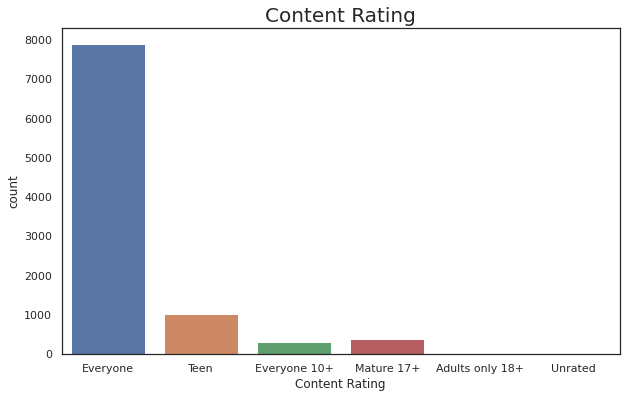

In [103]:
#Checking Content Rating for each app
plt.figure(figsize=(10,6))
sns.countplot(data=playstore_df,x='Content Rating')
plt.xticks(rotation=0)
plt.title('Content Rating',size = 20)

**Does the size of the app affect the ratings and number of installs?**

---



In [104]:
#Checking Family Category because it has most no of heavy apps
family_category=playstore_df[playstore_df['Category']=='GAME']
top_size_family=family_category.groupby('App')['Size','Rating','Type','Category'].max().sort_values(by='Size',ascending=False).reset_index()
top_size_family.head(10)


<ipython-input-104-96d476b4579b>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_size_family=family_category.groupby('App')['Size','Rating','Type','Category'].max().sort_values(by='Size',ascending=False).reset_index()


,App,Size,Rating,Type,Category
0,Car Crash III Beam DH Real Damage Simulator 2018,100.0,3.6,Free,GAME
1,Hungry Shark Evolution,100.0,4.5,Free,GAME
2,Mini Golf King - Multiplayer Game,100.0,4.5,Free,GAME
3,The Walking Dead: Our World,100.0,4.0,Free,GAME
4,Miami crime simulator,100.0,4.0,Free,GAME
5,Stickman Legends: Shadow Wars,100.0,4.4,Paid,GAME
6,Idle Heroes,99.0,4.7,Free,GAME
7,League of Stickman 2018- Ninja Arena PVP(Dream...,99.0,4.4,Paid,GAME
8,Hero Hunters,99.0,4.4,Free,GAME
9,Kill Shot Bravo: Sniper FPS,99.0,4.4,Free,GAME


Making the sub sizes of size column for size analysis

In [105]:
#apps which has size b/w [1-10]{MB}
size1_10=playstore_df[(playstore_df['Size']>=1) & (playstore_df['Size']<=10)]

In [106]:
#apps which has size b/w (10-20]{MB}
size10_20=playstore_df[(playstore_df['Size']>10) & (playstore_df['Size']<=20)]

In [107]:
#apps which has size b/w (20-30]{MB}
size20_30=playstore_df[(playstore_df['Size']>20) & (playstore_df['Size']<=30)]

In [108]:
#apps which has size b/w (30-40]{MB}
size30_40=playstore_df[(playstore_df['Size']>30) & (playstore_df['Size']<=40)]

In [109]:
#apps which has size b/w (40-50]{MB}
size40_50=playstore_df[(playstore_df['Size']>40) & (playstore_df['Size']<=50)]

In [110]:
#apps which has size b/w (50-60]{MB}
size50_60=playstore_df[(playstore_df['Size']>50) & (playstore_df['Size']<=60)]

In [111]:
#apps which has size b/w (60-70]{MB}
size60_70=playstore_df[(playstore_df['Size']>60) & (playstore_df['Size']<=70)]

In [112]:
#apps which has size b/w (70-80]{MB}
size70_80=playstore_df[(playstore_df['Size']>70) & (playstore_df['Size']<=80)]

In [113]:
#apps which has size b/w (80-90]{MB}
size80_90=playstore_df[(playstore_df['Size']>80) & (playstore_df['Size']<=90)]

In [114]:
#apps which has size b/w (90-100]{MB}
size90_100=playstore_df[(playstore_df['Size']>90) & (playstore_df['Size']<=100)]

In [115]:
#Making a dataframe for reviews in each sub sizes group
review_grpsize_df=pd.DataFrame({'1-10':[size1_10['Reviews'].sum()],
                    '10-20':[size10_20['Reviews'].sum()],
                    '20-30':[size20_30['Reviews'].sum()],
                    '30-40':[size30_40['Reviews'].sum()],
                    '40-50':[size40_50['Reviews'].sum()],
                    '50-60':[size50_60['Reviews'].sum()],
                    '60-70':[size60_70['Reviews'].sum()],
                    '70-80':[size70_80['Reviews'].sum()],
                    '80-90':[size80_90['Reviews'].sum()],
                    '90-100':[size90_100['Reviews'].sum()]})

Text(0, 0.5, 'Reviews(e+8)')

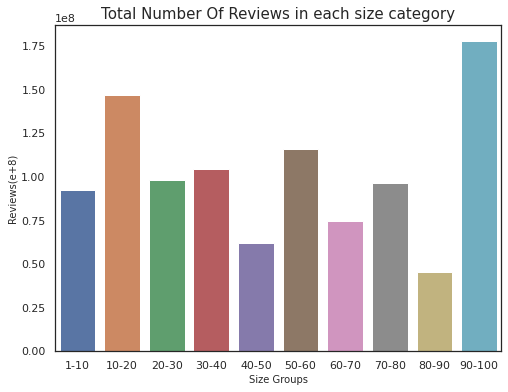

In [116]:
#ploting the above dataframe
plt.figure(figsize=(8,6))
sns.barplot(data=review_grpsize_df)
plt.title('Total Number Of Reviews in each size category',size=15)
plt.xlabel('Size Groups',size=10)
plt.ylabel('Reviews(e+8)',size=10)

In [117]:
#Making a dataframe for Installs in each sub sizes group
install_grpsize_df=pd.DataFrame({'1-10':[size1_10['Installs'].sum()],
                                 '10-20':[size10_20['Installs'].sum()],
                                 '20-30':[size20_30['Installs'].sum()],
                                 '30-40':[size30_40['Installs'].sum()],
                                 '40-50':[size40_50['Installs'].sum()],
                                 '50-60':[size50_60['Installs'].sum()],
                                 '60-70':[size60_70['Installs'].sum()],
                                 '70-80':[size70_80['Installs'].sum()],
                                 '80-90':[size80_90['Installs'].sum()],
                                 '90-100':[size90_100['Installs'].sum()],})

Text(0, 0.5, 'Installs(e+9)')

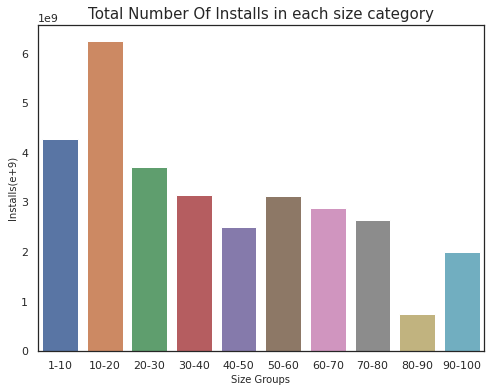

In [118]:
#Ploting for above dataframe
plt.figure(figsize=(8,6))
sns.barplot(data=install_grpsize_df)
plt.title('Total Number Of Installs in each size category',size=15)
plt.xlabel('Size Groups',size=10)
plt.ylabel('Installs(e+9)',size=10)

In [119]:
#Making a dataframe for no of apps in each sub sizes group
noofapps_grpsize_df=pd.DataFrame({'1-10':[len(size1_10.axes[0])],
                                 '10-20':[len(size10_20.axes[0])],
                                 '20-30':[len(size20_30.axes[0])],
                                 '30-40':[len(size30_40.axes[0])],
                                 '40-50':[len(size40_50.axes[0])],
                                 '50-60':[len(size50_60.axes[0])],
                                 '60-70':[len(size60_70.axes[0])],
                                 '70-80':[len(size70_80.axes[0])],
                                 '80-90':[len(size80_90.axes[0])],
                                 '90-100':[len(size90_100.axes[0])]})

Text(0, 0.5, 'Number Of Apps')

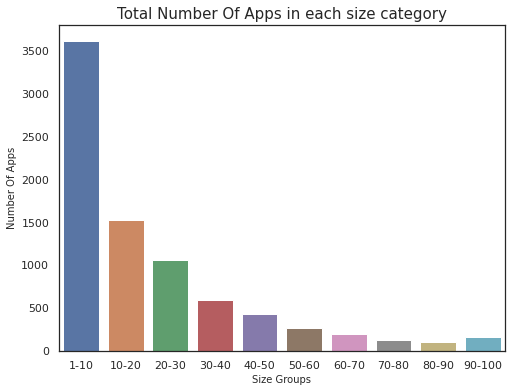

In [120]:
# Ploting for above dataframe
plt.figure(figsize=(8,6))
sns.barplot(data=noofapps_grpsize_df)
plt.title('Total Number Of Apps in each size category',size=15)
plt.xlabel('Size Groups',size=10)
plt.ylabel('Number Of Apps',size=10)

Text(0, 0.5, 'Installs(e+8)')

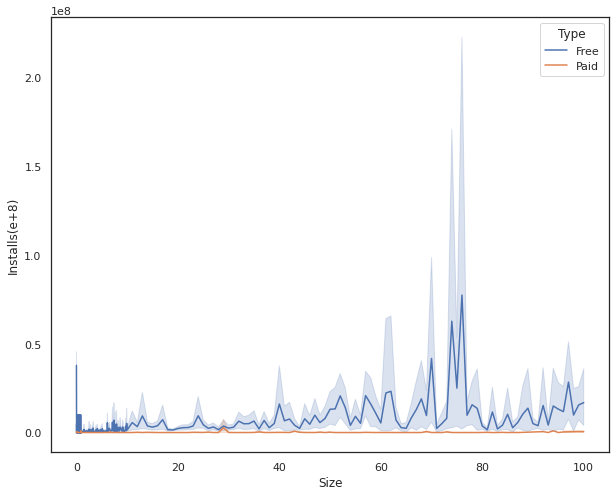

In [121]:
plt.figure(figsize=(10,8))
sns.lineplot(data=playstore_df,y='Installs',x='Size',hue='Type')
plt.ylabel('Installs(e+8)')

**Does the App prices affect rating and number of installs?**

---



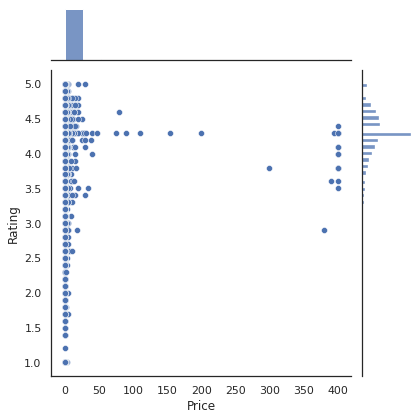

In [122]:
sns.jointplot(data=playstore_df,x='Price',y='Rating')

Text(336.9714285714286, 0.5, 'Size(MB)')

<Figure size 576x432 with 0 Axes>

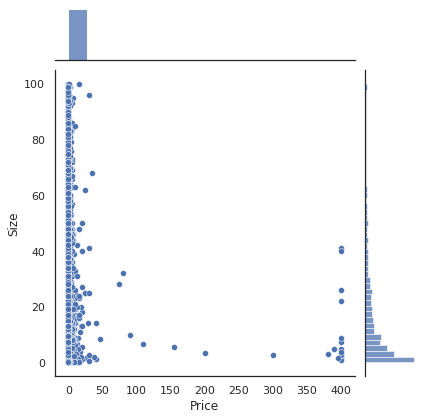

In [123]:
plt.figure(figsize=(8,6))
sns.jointplot(data=playstore_df,x='Price',y='Size')
plt.xlabel('Price($)',size=10)
plt.ylabel('Size(MB)',size=10)

a)Majority of the paid apps that are highly rated have small sizes. This means that most paid apps are designed and developed to cater to specific functionalities and hence are not in higher size.

b)Users prefer to pay for apps that are light-weighted. A paid app that is higher in size may not perform well in the market

c) we can say that(~1MB to ~10MB) size group has more no of apps but their installs and reviews are less

d) User Prefer to install those app which have more installs therefore they also have more number of reviews

e) (~90MB to ~100MB) have most no of reviews although this group have least no of apps and also the installs are not that remarkable.


**A broad Idea to understand apps in Playstore**

---



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

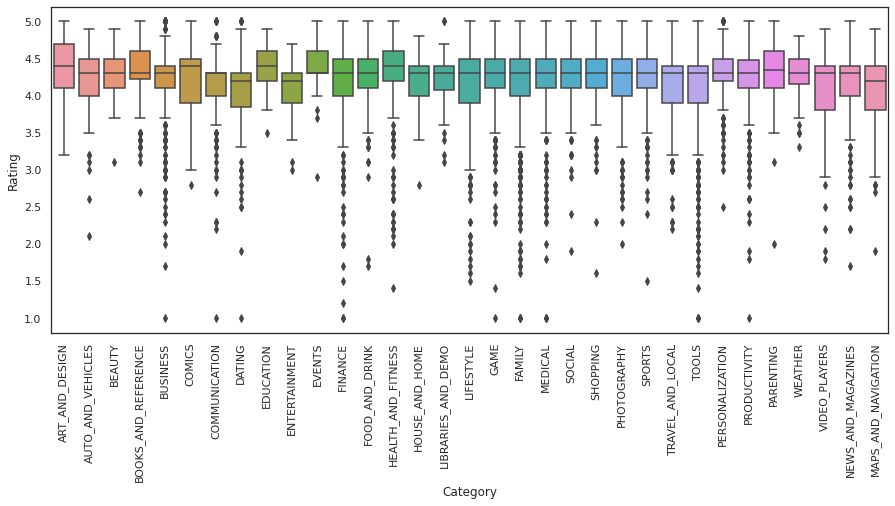

In [124]:
#Rating analysis
plt.figure(figsize=(15,6))
sns.boxplot(data=playstore_df,x='Category',y='Rating')
plt.xticks(rotation=90)

The Health and Fitness and Education are the best apps and other apps with 50% apps having a rating greater than 4.5. Interestingly, half of the Dating and Tools apps have a rating lower than the average.

In [125]:
#2nd data 
user_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [126]:
#joining it with old data(playstore_df)
new_df=pd.merge(playstore_df,user_df,how='left',on='App')
new_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70189,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,NaN,NaN,NaN,NaN
70190,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,NaN,NaN,NaN,NaN
70191,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,NaN,NaN,NaN,NaN
70192,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN,NaN,NaN,NaN


In [127]:
#dropping null values from column sentiment
new_df = new_df.dropna(subset=['Sentiment'])

In [128]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35934 entries, 1 to 69243
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35934 non-null  object 
 1   Category                35934 non-null  object 
 2   Rating                  35934 non-null  float64
 3   Reviews                 35934 non-null  float64
 4   Size                    35934 non-null  float64
 5   Installs                35934 non-null  float64
 6   Type                    35934 non-null  object 
 7   Price                   35934 non-null  float64
 8   Content Rating          35934 non-null  object 
 9   Genres                  35934 non-null  object 
 10  Last Updated            35934 non-null  object 
 11  Current Ver             35934 non-null  object 
 12  Android Ver             35934 non-null  object 
 13  Translated_Review       35929 non-null  object 
 14  Sentiment               35934 non-null

In [129]:
#final dataframe
new_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
5,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
6,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69228,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
69234,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
69241,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
69242,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941.0,0.0,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


In [130]:
#collecting all apps which have negative reviews
negative_sentiment_df=new_df[new_df['Sentiment']=='Negative']


In [131]:
#extracting those apps which have most no of negative reviews
negative_sentiment_count_df=negative_sentiment_df.groupby('App')['Sentiment'].count().sort_values(ascending=False).reset_index()


Text(0.5, 0, 'Negative Reviews')

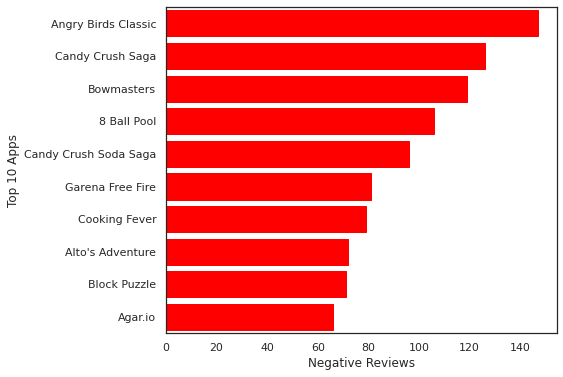

In [132]:
#plotting above dataframe
plt.figure(figsize=(7,6))
sns.barplot(data=negative_sentiment_count_df.head(10),x='Sentiment',y='App',Color='Red')
plt.ylabel('Top 10 Apps')
plt.xlabel('Negative Reviews')

In [133]:
#collecting all apps which have positive reviews
positive_sentiment_df=new_df[new_df['Sentiment']=='Positive']

In [134]:
##extracting those apps which have most no of negative reviews
positive_sentiment_count_df=positive_sentiment_df.groupby('App')['Sentiment'].count().sort_values(ascending=False).reset_index()

Text(0.5, 0, 'Positive Reviews')

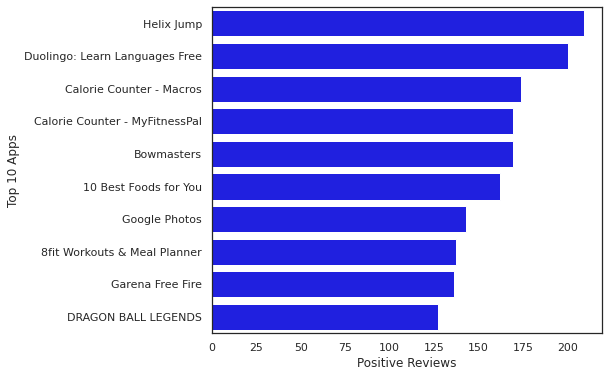

In [135]:
#plotting the above dataframe
plt.figure(figsize=(7,6))
sns.barplot(data=positive_sentiment_count_df.head(10),x='Sentiment',y='App', color='Blue')
plt.ylabel('Top 10 Apps')
plt.xlabel('Positive Reviews')

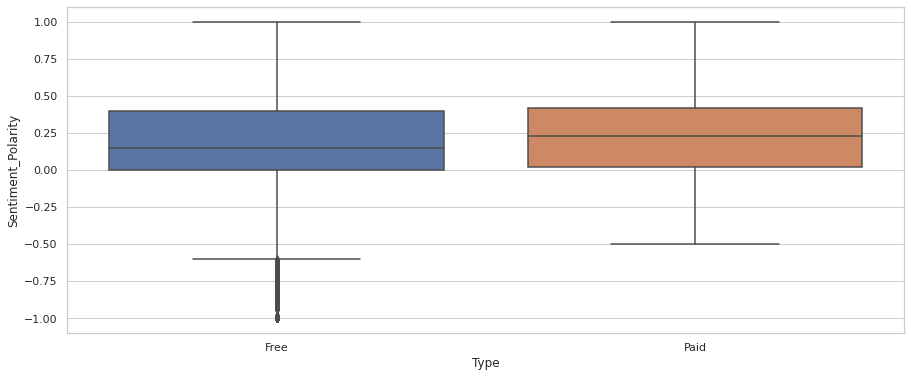

In [136]:
#ploting a box plot between sentiment polarity and type of apps
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.boxplot(data=new_df,x='Type',y='Sentiment_Polarity')

We compared the reviews between free and paid apps and found that people are harsher towards free apps whereas users are more tolerant when they are paying for it.

**Asking and Answering Questions**

---



Question 1: Top 5 Apps on the basis of Install?



In [137]:
top_install=playstore_df.groupby(['App','Category'])['Installs'].max().sort_values(ascending=False).reset_index()
top_install.head(15)

,App,Category,Installs
0,WhatsApp Messenger,COMMUNICATION,1.000000e+09
1,Google Photos,PHOTOGRAPHY,1.000000e+09
2,Google Street View,TRAVEL_AND_LOCAL,1.000000e+09
3,Google Chrome: Fast & Secure,COMMUNICATION,1.000000e+09
4,Google+,SOCIAL,1.000000e+09
5,Google Play Games,ENTERTAINMENT,1.000000e+09
6,Google Play Books,BOOKS_AND_REFERENCE,1.000000e+09
7,YouTube,VIDEO_PLAYERS,1.000000e+09
8,Google News,NEWS_AND_MAGAZINES,1.000000e+09
9,Google,TOOLS,1.000000e+09


Question 2: Top 5 Apps based on Reviews? 

In [138]:
top_review=playstore_df.groupby(['App','Category'])['Reviews'].max().sort_values(ascending=False).reset_index()
top_review.head(5)

,App,Category,Reviews
0,Facebook,SOCIAL,78158306.0
1,WhatsApp Messenger,COMMUNICATION,69119316.0
2,Instagram,SOCIAL,66577313.0
3,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847.0
4,Clash of Clans,GAME,44891723.0


Question 3: Top 5 Apps based on Price?

In [139]:
top_Price=playstore_df.groupby(['App','Category'])['Price','Rating','Installs','Size'].max().sort_values(by='Price',ascending=False).reset_index()
top_Price.head(10)

<ipython-input-139-1c26d66ff967>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_Price=playstore_df.groupby(['App','Category'])['Price','Rating','Installs','Size'].max().sort_values(by='Price',ascending=False).reset_index()


,App,Category,Price,Rating,Installs,Size
0,I'm Rich - Trump Edition,LIFESTYLE,400.00,3.6,10000.0,7.300000
1,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,399.99,4.3,0.0,40.000000
2,I am rich,LIFESTYLE,399.99,3.8,100000.0,1.800000
3,I am Rich Plus,FAMILY,399.99,4.0,10000.0,8.700000
4,I am rich (Most expensive app),FINANCE,399.99,4.1,1000.0,2.700000
5,I am Rich,FINANCE,399.99,4.3,5000.0,3.800000
6,I am rich(premium),FINANCE,399.99,3.5,5000.0,0.942383
7,most expensive app (H),FAMILY,399.99,4.3,100.0,1.500000
8,I Am Rich Pro,FAMILY,399.99,4.4,5000.0,2.700000
9,I Am Rich Premium,FINANCE,399.99,4.1,50000.0,4.700000


Question 4: Top 5 based on Size?

In [140]:
top_size=playstore_df.groupby(['App','Category'])['Size'].max().sort_values(ascending=False).reset_index()
top_size.head(10)

,App,Category,Size
0,SimCity BuildIt,FAMILY,100.0
1,Navi Radiography Pro,MEDICAL,100.0
2,Gangster Town: Vice District,FAMILY,100.0
3,Ultimate Tennis,SPORTS,100.0
4,The Walking Dead: Our World,GAME,100.0
5,Mini Golf King - Multiplayer Game,GAME,100.0
6,Stickman Legends: Shadow Wars,GAME,100.0
7,Talking Babsy Baby: Baby Games,LIFESTYLE,100.0
8,Draft Simulator for FUT 18,SPORTS,100.0
9,Vi Trainer,HEALTH_AND_FITNESS,100.0


**Inferences and Conclusion**

---

1) Most No of Apps in the playstore are from category FAMILY,GAMES AND TOOLS.

2) Most Installed Apps(in sum) are from Category Games and Communication but the maximun apps which is installed from playstore are WhatsApp Messenger(category=  Communication), Instagram(category=Social), Messenger – Text and Video Chat for Free(category=Communication).

3) Most Apps are Reviewed(in sum) from Category Games and Communication but the apps which has most number of Reviews are Facebook(category=  Social), WhatsApp Messenger	(category=Communication), Instagram(category=Communication).

4)Most Expensive apps(in sum) are from Category Finanace and Lifestyle but most expensive apps are I'm Rich - Trump Edition(category=  Lifestyle), I'm Rich/Eu sou Rico/أنا غني/我很有錢	(category=Lifestyle), I am rich(category=Lifestyle).

5)Most Expensive apps(in sum) are from Category Finanace and Lifestyle but most expensive apps are I'm Rich - Trump Edition(category=  Lifestyle), I'm Rich/Eu sou Rico/أنا غني/我很有錢	(category=Lifestyle), I am rich(category=Lifestyle).

6) Games and Family category has also more no apps which are more in sizes(in sum) but the apps which are bigger in size are SimCity BuildIt (category=Family),Navi Radiography Pro	(category= Medical),Gangster Town: Vice District(category=Family)

7) Categories Entertainment,House & Home, Weather, Maps & Navigation, Beauty, Videoplayers, Education, Auto & Vehicles, News & Magzines have not even one app which has rating of 5.

8)The majority of top-rated apps (rating over 4) range from 2 MB to 20 MB and  the vast majority of apps in the playstore are free as compared to paid apps.

9)Most top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too higher in size.

10)The optimal size of apps which have most number of installs is ranging between (~60MB TO ~80MB).Majority of the paid apps that are highly rated have small sizes. This means that most paid apps are designed and developed to cater to specific functionalities and hence are not in higher size.Users prefer to pay for apps that are light-weighted. A paid app that is higher in size may not perform well in the market.

11)The Health and Fitness and Education are the best apps and other apps with 50% apps having a rating greater than 4.5. Interestingly, half of the Dating and Tools apps have a rating lower than the average.

12)By comparing the reviews between free and paid apps we found that people are harsher towards free apps whereas users are more tolerant when they are paying for it.